In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Preprocessing
df = pd.read_csv('CarPrice_Assignment.csv')
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [38]:
print(df.shape)

(205, 26)


In [39]:
print(df.info)

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [40]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [41]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [42]:
#no missing values

In [43]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

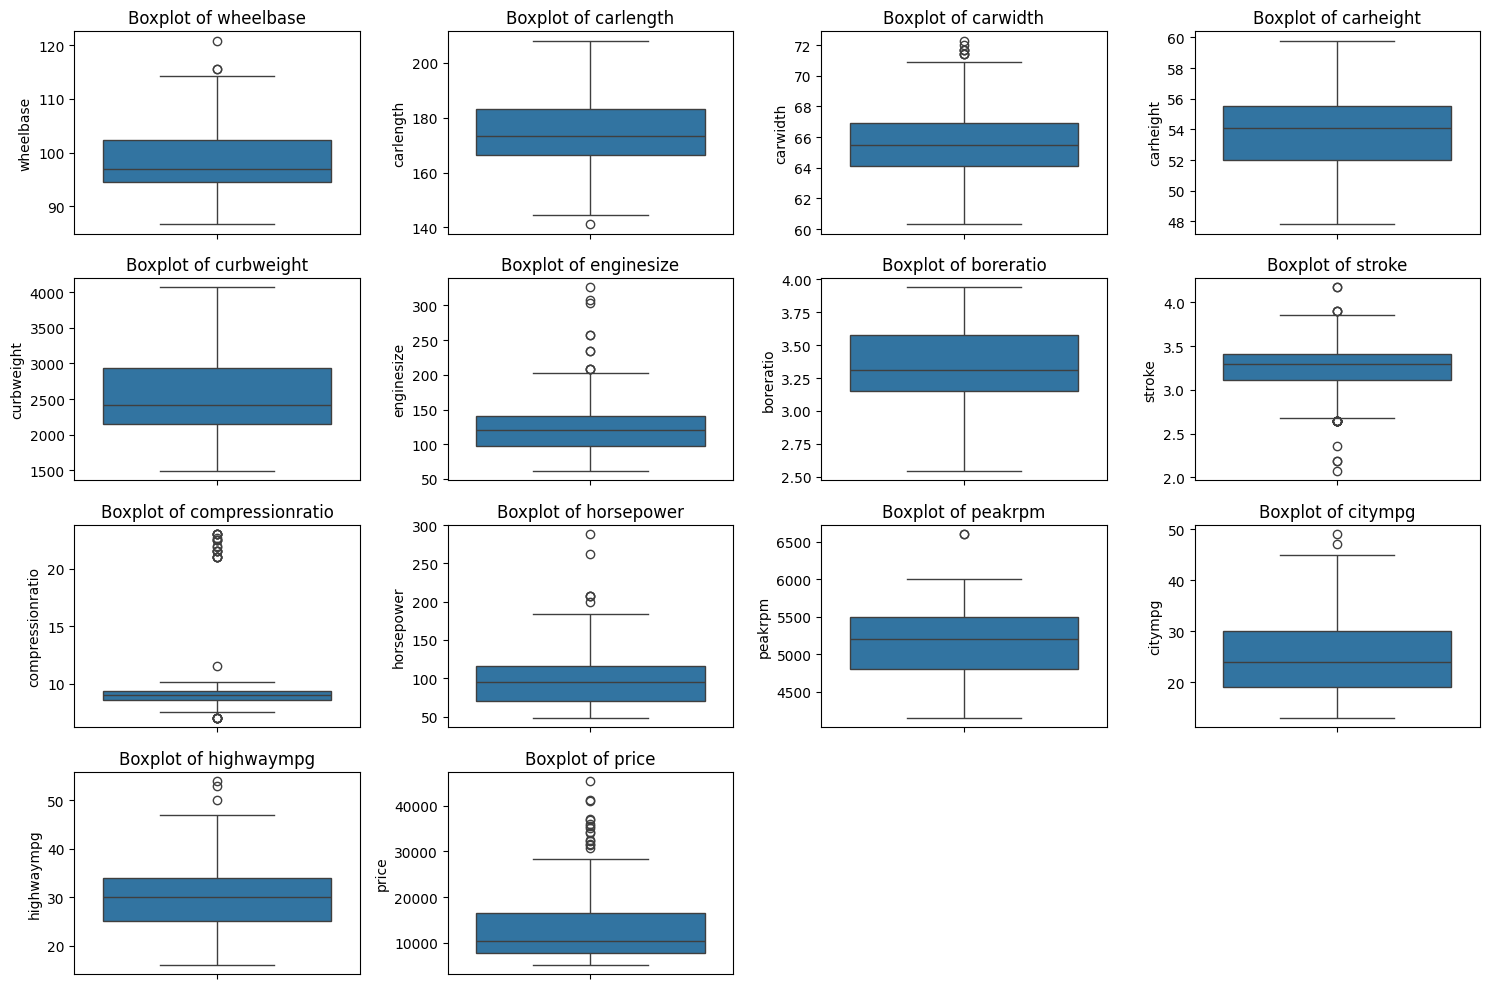

In [44]:
# List of numerical columns
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Creating a boxplot for each numerical column
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout() 
plt.show()

In [45]:
#  Outlier Detection and Removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()


for col in numerical_columns:
    df_cleaned = remove_outliers(df_cleaned, col)


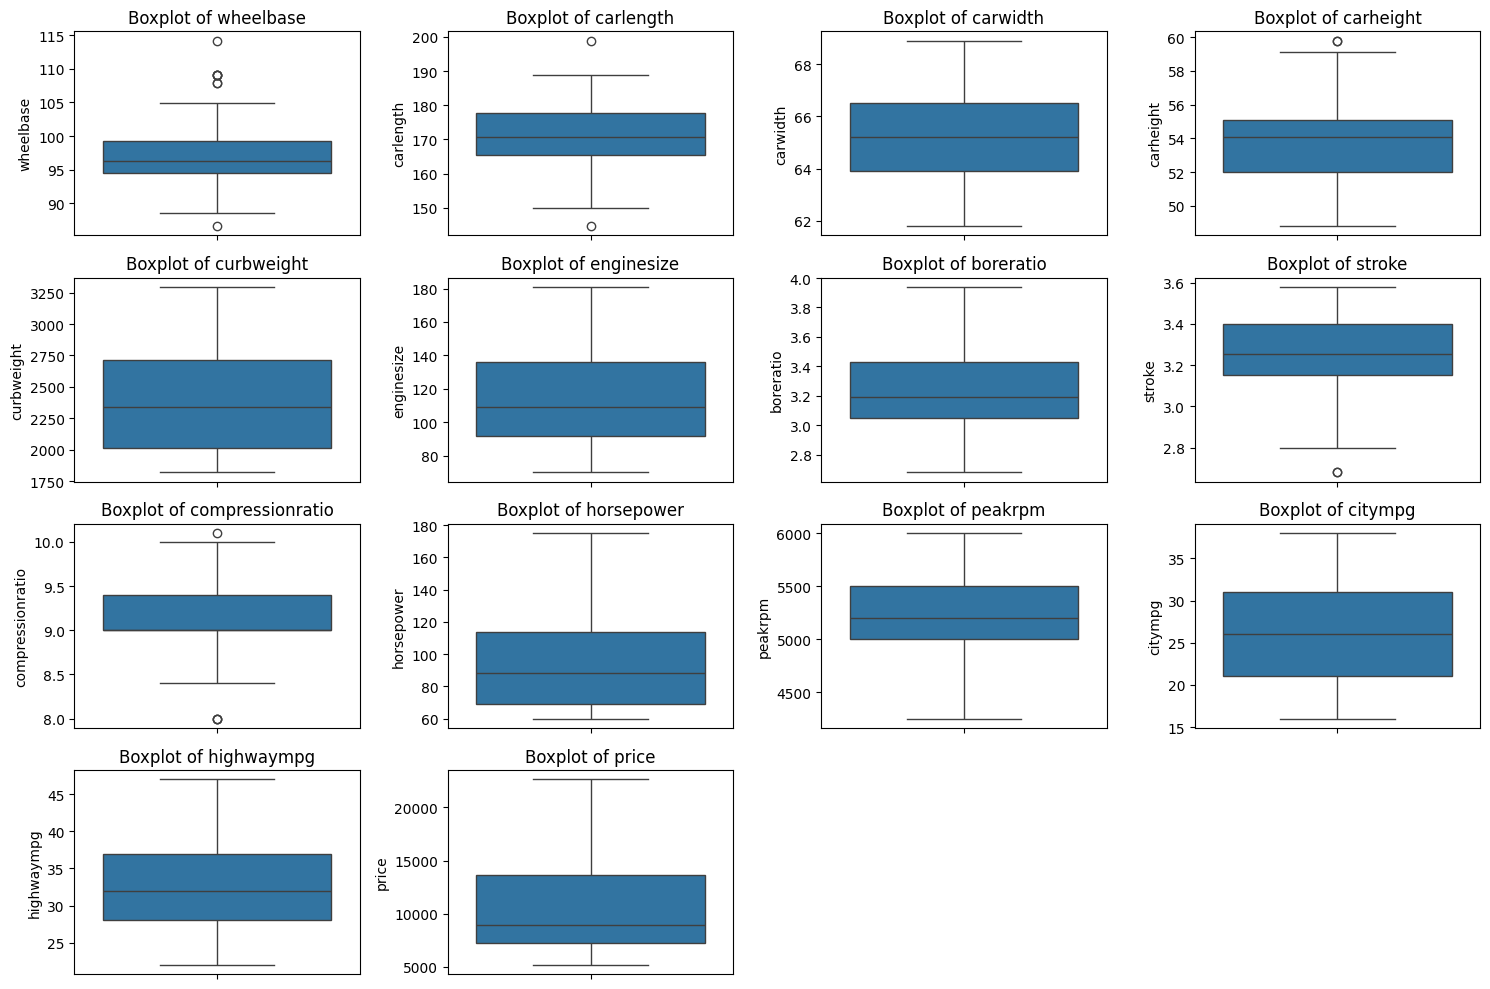

In [46]:
# Checking with  boxplot for each numerical column
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df_cleaned[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout() 
plt.show()

In [47]:
# Overwrite the original dataframe (df) with the cleaned dataframe (df_cleaned)
df = df_cleaned.copy()

In [48]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)


In [49]:
# Separate features and target
X = df.drop('price', axis=1)  
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# 2. Model Implementation

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

In [51]:
# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Training models 
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'SVR':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'r2': r2,
        'mse': mse,
        'mae': mae
    }
    
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")


Training Linear Regression...
R-squared: -1642.5546
MSE: 24263362282.3841
MAE: 119266.8416

Training Decision Tree...
R-squared: 0.7238
MSE: 4077913.8200
MAE: 1548.9600

Training Random Forest...
R-squared: 0.8689
MSE: 1934870.0631
MAE: 1091.3122

Training Gradient Boosting...
R-squared: 0.8512
MSE: 2197188.1041
MAE: 1210.5755

Training SVR...
R-squared: 0.0013
MSE: 14743718.4703
MAE: 2840.9240


In [53]:
# 3. Model Evaluation
metrics_df = pd.DataFrame({
    'Model': results.keys(),
    'R-squared': [results[model]['r2'] for model in results],
    'MSE': [results[model]['mse'] for model in results],
    'MAE': [results[model]['mae'] for model in results]
})

print("\nModel Comparison:")
print(metrics_df)


Model Comparison:
               Model    R-squared           MSE            MAE
0  Linear Regression -1642.554628  2.426336e+10  119266.841611
1      Decision Tree     0.723770  4.077914e+06    1548.960000
2      Random Forest     0.868936  1.934870e+06    1091.312200
3  Gradient Boosting     0.851167  2.197188e+06    1210.575534
4                SVR     0.001288  1.474372e+07    2840.923965


In [54]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
print(f"\nBest performing model: {best_model_name}")


Best performing model: Random Forest


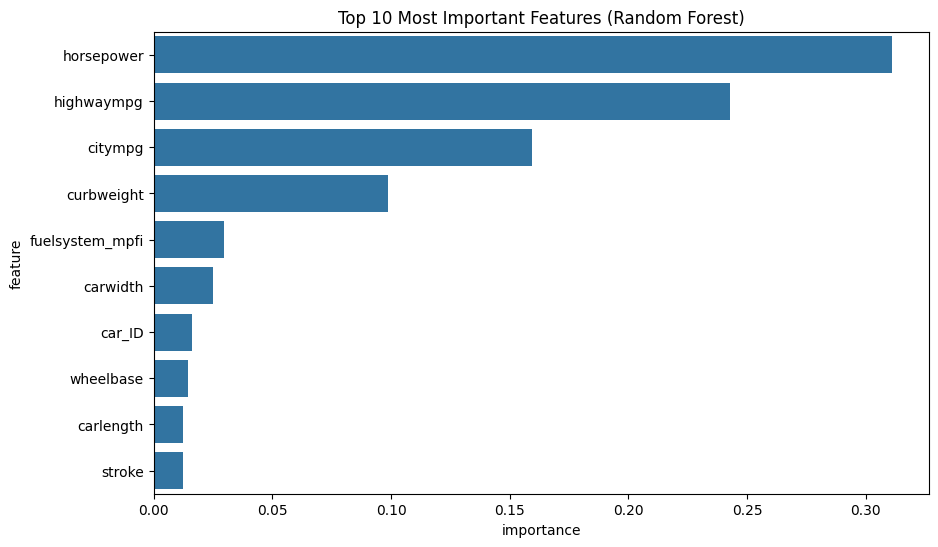


Top 10 most important features:
             feature  importance
11        horsepower    0.310916
14        highwaympg    0.242819
13           citympg    0.159533
6         curbweight    0.098778
137  fuelsystem_mpfi    0.029575
4           carwidth    0.024903
0             car_ID    0.016293
2          wheelbase    0.014445
3          carlength    0.012523
9             stroke    0.012206


In [55]:
# 4. Feature Importance Analysis
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    model = results[best_model_name]['model']
    importances = model.feature_importances_
    feature_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_imp.head(10))
    plt.title(f'Top 10 Most Important Features ({best_model_name})')
    plt.show()
    
    print("\nTop 10 most important features:")
    print(feature_imp.head(10))


In [56]:
# 5. Hyperparameter Tuning
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestRegressor(random_state=42)

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 4, 5]
    }
    base_model = GradientBoostingRegressor(random_state=42)

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Performing grid search
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print("\nBest parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Evaluate tuned model
    best_tuned_model = grid_search.best_estimator_
    y_pred_tuned = best_tuned_model.predict(X_test)
    r2_tuned = r2_score(y_test, y_pred_tuned)
    
    print(f"\nTuned model R-squared: {r2_tuned:.4f}")
    print(f"Original model R-squared: {results[best_model_name]['r2']:.4f}")



Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8250446154711163

Tuned model R-squared: 0.8700
Original model R-squared: 0.8689


In [57]:
#  final summary
print("\nAnalysis Summary:")
print("-" * 50)
print(f"Best Model: {best_model_name}")
print(f"Best R-squared Score: {results[best_model_name]['r2']:.4f}")
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print(f"Tuned R-squared Score: {r2_tuned:.4f}")
print(f"Most Important Features :")
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print(feature_imp.head(3).to_string())


Analysis Summary:
--------------------------------------------------
Best Model: Random Forest
Best R-squared Score: 0.8689
Tuned R-squared Score: 0.8700
Most Important Features :
       feature  importance
11  horsepower    0.310916
14  highwaympg    0.242819
13     citympg    0.159533
